# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Tim\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df

clean_hospital_read_df = clean_hospital_read_df[~np.isnan(clean_hospital_read_df['Excess Readmission Ratio'])]

In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


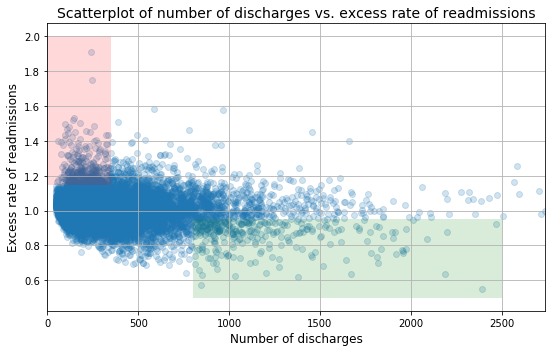

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

    The analysis is missing an actual hypothesis test. Just comparing the sample statistics should not be enough for a recommendation. Looking at the graph, it definitely seems like the the bulk of the low capacity values are distributed close to 1.0, just like for high-capacity hospitals. With a lower number of discharges, it seems reasonable that there would be more variance and therefore more outliers.
    
    Also, why only compare hospitals with less than 100 versus hospitals with more than 1000 discharges and then recommend policy based on whether the discharges are less than 300? There are a lot less hospitals with more than 1000 and that hurts the conclusion.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Methodology

My first thought was that since all of the hospitals have different sizes, the right way to think of the dataset was as thousands of different samples of patients rather than one sample of hospitals. I started to work on a bootstrap hypothesis test with this paradigm, but I ran into a problem. I can't figure out how the predicted readmission rate is calculated. As far as I can tell, it uses information that isn't present in the set.


So now, treating each hospital as a datapoint (which is what the given analysis did anyway), let's do a hypothesis test for the analysis's conclusion. The hypothesis that we're going to test is whether hospitals with less than 300 discharges per 30-day period have statistically higher readmission rates than those with more than 300.

Null hypothesis: There is no difference in readmission rates between hospitals with few and many discharges.

In [9]:
import scipy.stats as stats
from IPython.display import clear_output

In [10]:
#separate the two samples I'm going to compare
big = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 300][['Number of Discharges', 'Excess Readmission Ratio']]
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300][['Number of Discharges', 'Excess Readmission Ratio']]

#record some sample statistics
n1=big.shape[0] #sample size
n2=small.shape[0]
m1=big['Excess Readmission Ratio'].mean() #sample mean
m2=small['Excess Readmission Ratio'].mean()
s1=big['Excess Readmission Ratio'].std() #sample standard deviation
s2=small['Excess Readmission Ratio'].std()
mean_diff=m2-m1 #difference in the two means

print('Difference in means: ', mean_diff)

#Bootstrap approach using permutation sampling

#Set the number of permutations
size=10**4

#preallocate memory for permutation samples' difference in mean
perm_mean_diffs=np.empty(size)

#iterate 10,000 times
for i in range(size):
    #randomly permute the readmission rate column
    perm_sample=np.random.permutation(clean_hospital_read_df['Excess Readmission Ratio'])
    
    #partition into two bootstrap sets, one for big hospitals and one for small, with same size as the originals
    big_perm=perm_sample[:n1]
    small_perm=perm_sample[n1:]
    #calculate proportion difference and save in perm_mean_diffs
    perm_mean_diffs[i]=small_perm.mean() - big_perm.mean()

#calculate p-value: number of bootstrap samples with proportion difference greater than the original
bs_p_val=(perm_mean_diffs >= mean_diff).sum()/size

#calculate 95% confidence interval
bs_conf_int=list(np.round(np.percentile(perm_mean_diffs,[2.5,97.5]),3))

print('********')
print('Bootstrap P value: ',bs_p_val)
print('Bootstrap 95% confidence interval: ',bs_conf_int)


Difference in means:  0.014457168378321783
********
Bootstrap P value:  0.0
Bootstrap 95% confidence interval:  [-0.003, 0.003]


### Conclusion

The sample is in fact very convincing that we can reject the null hypothesis and is evidence that hospitals with less discharges have higher readmission rates.

As far as statistical significance versus practical significance, the main consideration here is that these numbers represent real people's lives and healthiness. So even if the test wants to ignore outliers, it may still be worth recommending policy that helps those outliers. In this case, though, we still recommend that smaller hospitals do more to give quality of care, so the practical significance does not affect the recommendation.

*****************

In order to make a plot that better shows the distribution of excess readmission rates, I want to use a violinplot from the seaborn package (at first I was going to use a swarmplot but there's too many values). As you can see in the plot below, this shows that the primary difference is in the outliers, highlighting that the small hospitals mostly have outliers above 1.

In [11]:
import seaborn as sns

In [12]:
#create a categorical variable in the dataset describing size of the hospital
small = (clean_hospital_read_df['Number of Discharges'] < 300)
clean_hospital_read_df['Size']=pd.Categorical(np.where(small,'< 300','>= 300'))

C:\Users\Tim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


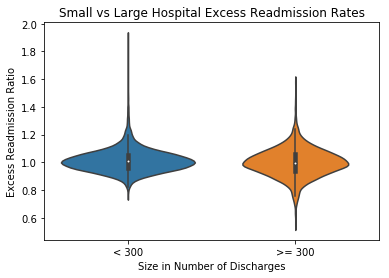

In [13]:
sns.violinplot(x='Size',y='Excess Readmission Ratio',data=clean_hospital_read_df)
plt.title('Small vs Large Hospital Excess Readmission Rates')
plt.xlabel('Size in Number of Discharges')
plt.show()